In [1]:
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 16.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.2 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 12.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.3 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 82.8 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.9.41
    Uninstalling nvidia-nvjitlink-cu12-12.9.41:
      Successfully uninstalled nvidia-nvjitlink-cu12-12.9.41
  Attempting uninstall: nvidia-curand-cu12
    Found exi

In [9]:
!pip install --upgrade ultralytics supervision roboflow -q


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 37.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 108.8 MB/s eta 0:00:0000:01
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datasets 3.6.0 requires fsspec[http]<=2025.3.0,>=2023.1.0, but you have fsspec 2025.3.2 which is incompatible.
google-colab 1.0.0 requires google-auth==2.38.0, but you have google-auth 2.40.1 which is incompatible.
google-colab 1.0.0 requires notebook==6.5.7, but you have notebook 6.5.4 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
bigframes 1.42.0 requires rich<14,>=12.4.4, but you have rich 14.0.0 which is incompatible.
google-spark-connect 0.5.2 requires google-api-core>=2.19.1, but you have google-api-core 1.34.1 which is incompatible.
google-cloud-bigtable 2.30.0 requires

In [10]:
yaml_content = """
train: /kaggle/input/road-lane-segmentation-imgs-and-labels/dataset/train
val: /kaggle/input/road-lane-segmentation-imgs-and-labels/dataset/val
test: /kaggle/input/road-lane-segmentation-imgs-and-labels/dataset/test

nc: 1
names: ['lane']
"""
with open("/kaggle/working/data_model.yaml", "w+") as f:
    f.write(yaml_content)

In [11]:
from ultralytics import YOLO

# Load YOLOv11 segmentation model (replace with path if local)
model = YOLO("yolo11s-seg.pt")

# Train
results = model.train(
    data="/kaggle/working/data_model.yaml",
    epochs=6,
    imgsz=640,
    batch=8,
    name="yolo11_lane_seg",
    device=0,
    plots=True
)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 19.7M/19.7M [00:00<00:00, 29.5MB/s]


Ultralytics 8.3.150 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/data_model.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=6, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11s-seg.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolo11_lane_seg, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=Tru

100%|██████████| 755k/755k [00:00<00:00, 4.52MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  3                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  4                  -1  1    103360  ultralytics.nn.modules.block.C3k2            [128, 256, 1, False, 0.25]    
  5                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
  6                  -1  1    346112  ultralytics.nn.modules.block.C3k2            [256, 256, 1, True]           
  7                  -1  1   1180672  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 19.5MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 22.9±12.0 MB/s, size: 93.0 KB)


train: Scanning /kaggle/input/road-lane-segmentation-imgs-and-labels/dataset/train/labels... 815 images, 0 backgrounds, 0 corrupt: 100%|██████████| 815/815 [00:02<00:00, 393.03it/s]

WARNING ⚠️ train: Cache directory /kaggle/input/road-lane-segmentation-imgs-and-labels/dataset/train is not writeable, cache not saved.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 33.1±19.2 MB/s, size: 109.7 KB)


val: Scanning /kaggle/input/road-lane-segmentation-imgs-and-labels/dataset/val/labels... 101 images, 0 backgrounds, 0 corrupt: 100%|██████████| 101/101 [00:00<00:00, 291.14it/s]

WARNING ⚠️ val: Cache directory /kaggle/input/road-lane-segmentation-imgs-and-labels/dataset/val is not writeable, cache not saved.


Plotting labels to runs/segment/yolo11_lane_seg/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 90 weight(decay=0.0), 101 weight(decay=0.0005), 100 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/segment/yolo11_lane_seg
Starting training for 6 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


        1/6       3.2G     0.8144      1.981      1.522      1.144         33        640: 100%|██████████| 102/102 [00:29<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.61it/s]

                   all        101        201      0.852      0.886      0.935      0.781      0.844      0.816      0.847      0.601



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


        2/6      4.23G      0.706      1.241     0.7459       1.04         31        640: 100%|██████████| 102/102 [00:26<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.96it/s]

                   all        101        201      0.923      0.925      0.964      0.844      0.838      0.781      0.771      0.292



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


        3/6      4.27G     0.6502       1.11     0.6499      1.002         29        640: 100%|██████████| 102/102 [00:26<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.95it/s]

                   all        101        201      0.966      0.978       0.99      0.913      0.946      0.959      0.969      0.734



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


        4/6      4.31G     0.6029     0.9285     0.5706     0.9764         22        640: 100%|██████████| 102/102 [00:26<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  5.00it/s]

                   all        101        201       0.98       0.99      0.993       0.94       0.98      0.985      0.989      0.895



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


        5/6      4.35G     0.5286     0.8306     0.5026     0.9513         23        640: 100%|██████████| 102/102 [00:26<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.99it/s]

                   all        101        201      0.968       0.98      0.992      0.967      0.963      0.975      0.988      0.906



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


        6/6      4.39G     0.4754     0.7701     0.4383     0.9317         26        640: 100%|██████████| 102/102 [00:26<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<00:00,  4.96it/s]

                   all        101        201      0.991          1      0.994      0.976      0.986      0.995       0.99      0.927



6 epochs completed in 0.048 hours.
Optimizer stripped from runs/segment/yolo11_lane_seg/weights/last.pt, 20.5MB
Optimizer stripped from runs/segment/yolo11_lane_seg/weights/best.pt, 20.5MB

Validating runs/segment/yolo11_lane_seg/weights/best.pt...
Ultralytics 8.3.150 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLO11s-seg summary (fused): 113 layers, 10,067,203 parameters, 0 gradients, 35.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.47it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        101        201      0.991          1      0.994      0.976      0.986      0.995       0.99      0.927
Speed: 0.4ms preprocess, 7.3ms inference, 0.0ms loss, 3.5ms postprocess per image
Results saved to runs/segment/yolo11_lane_seg


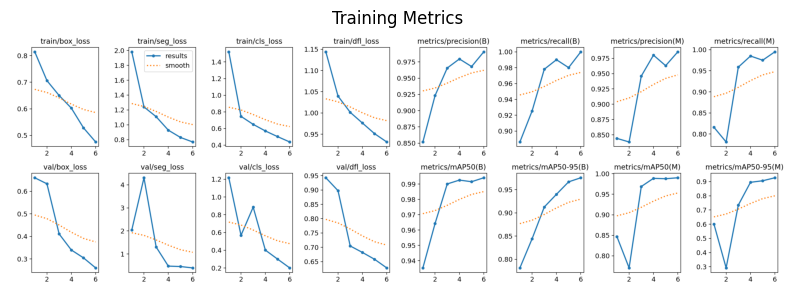

In [14]:
import matplotlib.pyplot as plt
import cv2

results_path = f"/kaggle/working/runs/segment/yolo11_lane_seg/results.png"
img = cv2.imread(results_path)
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Training Metrics')
plt.show()


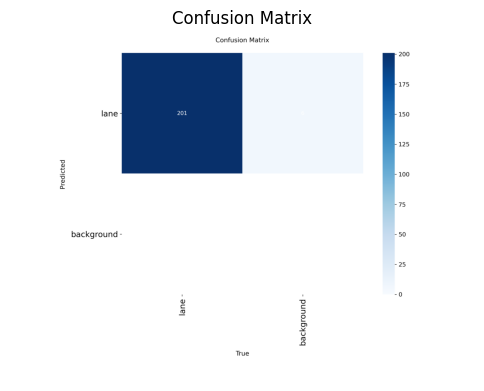

In [15]:
conf_matrix_path = f"/kaggle/working/runs/segment/yolo11_lane_seg/confusion_matrix.png"
conf_img = cv2.imread(conf_matrix_path)
plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(conf_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import os

# ✅ Load the trained model
model = YOLO('/kaggle/working/runs/segment/yolo11_lane_seg/weights/best.pt')

# ✅ Choose an image from your test set
image_path = '/kaggle/input/road-lane-segmentation-imgs-and-labels/dataset/test/images/i101.jpg'  # CHANGE THIS NAME

# ✅ Run prediction
results = model.predict(source=image_path, save=True, save_txt=True, imgsz=640, conf=0.25)

# ✅ Get path to predicted image
predicted_img_path = os.path.join(results[0].save_dir, os.path.basename(image_path))

# ✅ Display prediction
img = cv2.imread(predicted_img_path)
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("YOLOv11 Segmentation Output")
plt.show()



image 1/1 /kaggle/input/road-lane-segmentation-imgs-and-labels/dataset/test/images/i101.jpg: 640x640 2 lanes, 11.6ms
Speed: 1.8ms preprocess, 11.6ms inference, 12.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict
1 label saved to runs/segment/predict/labels


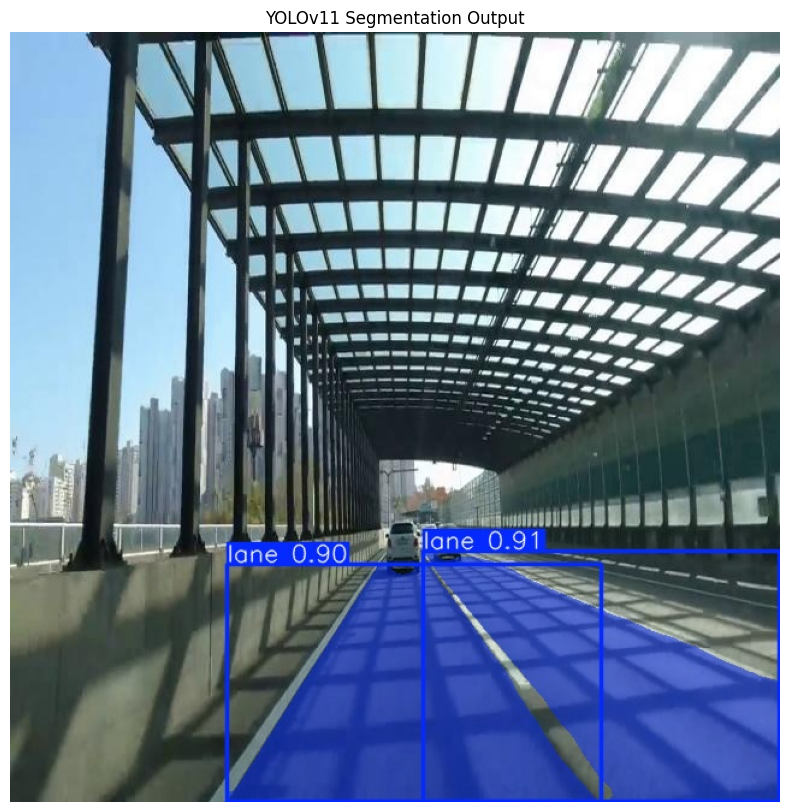

In [20]:
img = cv2.imread(predicted_img_path)
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("YOLOv11 Segmentation Output")
plt.show()


In [22]:
!zip -r /kaggle/working/output.zip /kaggle/working/


  adding: kaggle/working/ (stored 0%)
  adding: kaggle/working/.virtual_documents/ (stored 0%)
  adding: kaggle/working/yolo11n.pt (deflated 11%)
  adding: kaggle/working/runs/ (stored 0%)
  adding: kaggle/working/runs/segment/ (stored 0%)
  adding: kaggle/working/runs/segment/yolo11_lane_seg/ (stored 0%)
  adding: kaggle/working/runs/segment/yolo11_lane_seg/BoxR_curve.png (deflated 20%)
  adding: kaggle/working/runs/segment/yolo11_lane_seg/BoxPR_curve.png (deflated 30%)
  adding: kaggle/working/runs/segment/yolo11_lane_seg/results.png (deflated 8%)
  adding: kaggle/working/runs/segment/yolo11_lane_seg/val_batch0_pred.jpg (deflated 7%)
  adding: kaggle/working/runs/segment/yolo11_lane_seg/train_batch0.jpg (deflated 3%)
  adding: kaggle/working/runs/segment/yolo11_lane_seg/val_batch2_labels.jpg (deflated 6%)
  adding: kaggle/working/runs/segment/yolo11_lane_seg/confusion_matrix_normalized.png (deflated 39%)
  adding: kaggle/working/runs/segment/yolo11_lane_seg/MaskF1_curve.png (deflated

In [24]:
from ultralytics import YOLO

# Load the best model
model = YOLO("/kaggle/working/runs/segment/yolo11_lane_seg/weights/best.pt")

# Evaluate the model on the test set
metrics = model.val(data="/kaggle/working/data_model.yaml", split='test')


Ultralytics 8.3.150 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLO11s-seg summary (fused): 113 layers, 10,067,203 parameters, 0 gradients, 35.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 30.1±16.3 MB/s, size: 107.7 KB)


val: Scanning /kaggle/input/road-lane-segmentation-imgs-and-labels/dataset/test/labels... 103 images, 0 backgrounds, 0 corrupt: 100%|██████████| 103/103 [00:00<00:00, 389.26it/s]

WARNING ⚠️ val: Cache directory /kaggle/input/road-lane-segmentation-imgs-and-labels/dataset/test is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.96it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        103        206      0.986      0.995      0.995      0.968       0.99      0.985      0.994      0.918
Speed: 3.4ms preprocess, 8.5ms inference, 0.0ms loss, 3.0ms postprocess per image
Results saved to runs/segment/val2


In [27]:
# ✅ Use properties, not method calls
print(f"Precision:     {metrics.seg.mp:.4f}")
print(f"Recall:        {metrics.seg.mr:.4f}")
print(f"mAP@0.5:       {metrics.seg.map50:.4f}")
print(f"mAP@0.5:0.95:  {metrics.seg.map:.4f}")


Precision:     0.9902
Recall:        0.9847
mAP@0.5:       0.9943
mAP@0.5:0.95:  0.9182
